# ⚜️《C1 Introduction Tensorflow》

[Coursera课程地址](https://www.coursera.org/learn/introduction-tensorflow/home/week/4)  
[GITEE python代码 ](https://gitee.com/golden-mountain/py-machine-learning)  
[Tensorflow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras/)  
[主讲老师劳伦斯的个人网站](https://laurencemoroney.com/about.html)  
[Kaggle:机器学习挑战和奖品](https://www.kaggle.com/)

主流深度学习框架和软件对比：  

| 名称         | 类别            | 优点                                                   | 缺点                             | 适用场景                    |
|-------------|---------------|------------------------------------------------------|--------------------------------|---------------------------|
| **OpenCV**  | 计算机视觉库   | 轻量级，支持传统图像处理算法，C++/Python 兼容，开源免费 | 传统算法对复杂任务效果有限      | 图像处理、特征提取、目标检测 |
| **Halcon**  | 商业视觉软件   | 工业级稳定性，3D 视觉支持良好，封装完备                 | 商业收费，灵活性低              | 生产线检测、精密测量        |
| **TensorFlow** | 深度学习框架 | 生态完善，支持 TPU/GPU，谷歌维护，支持大规模训练        | 学习曲线陡峭，较重              | 图像分类、目标检测、语音识别 |
| **PyTorch** | 深度学习框架   | 动态计算图，调试方便，开发者友好，社区活跃              | 推理优化略逊于 TensorFlow       | 深度学习研究、模型训练       |
| **YOLO**    | 目标检测模型   | 速度快，适合实时检测，单次前向传播完成检测              | 精度低于 Faster R-CNN 等两阶段检测 | 目标检测、安全监控、缺陷检测 |
  

组托防错项目使用Halcon作为深度学习框架。

# W1 用Tensorflow解决简单线性问题

## 机器学习入门  

传统编程：输入规则和数据， 得到结果。
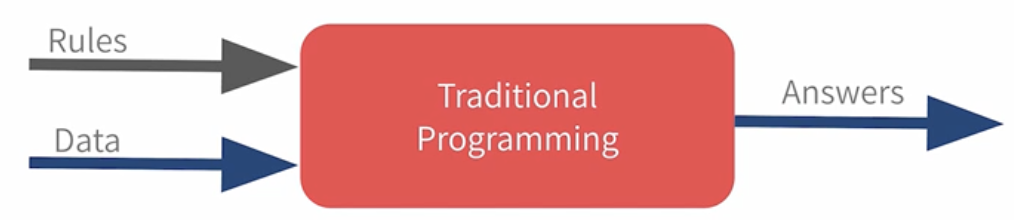

机器学习：输入数据和答案，让机器总结规律
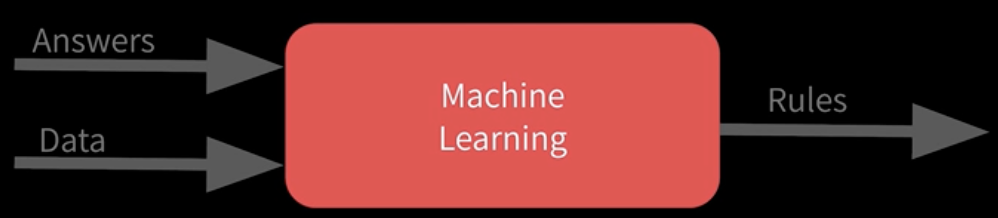

## 使Tensorflow掌握y=2x-1的规律
现在有数列x：   
`x_array = [0, 1, 2, 3, 4, 5]`   
x经过某种计算，得到数列y   
`y_array = [-1, 1, 3, 5, 7, 9]`

使用Tensorflow训练数据，使程序掌握x数列与y数列的规律，然后预测当x=7,8或9时，y的传值。  

In [ ]:
import tensorflow as tf
import numpy as np

# 1. 构造训练数据 (y = 2x - 1)
def create_training_data():

    # Define feature and target tensors with the values for houses with 1 up to 6 bedrooms.
    # For this exercise, please arrange the values in ascending order (i.e. 1, 2, 3, and so on).
    x_train = np.array([0, 1, 2, 3, 4, 5], dtype=np.float32)  # 输入数据
    y_train = np.array([-1, 1, 3, 5, 7, 9], dtype=np.float32)   # 真实标签, 其实只有6个数[-1, 1, 3, 5, 7, 9]， x_train的值只有六个


    return x_train, x_train

def define_and_compile_model():

    # Define a compiled (but untrained) model。 定义模型，就是定义模型的神经图络层。
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(1,)),  # 输入层：1个输入特征
        tf.keras.layers.Dense(units=1)  # 输出层：1个神经元
    ])

    # 编译模型
    # sgd（Stochastic Gradient Descent，随机梯度下降）
    # mse（Mean Squared Error，均方误差），衡量预测值与真实值之间的差距。
    model.compile(optimizer='sgd', loss="mse")

    return model

def train_model():

    # Define feature and target tensors with the values for houses with 1 up to 6 bedrooms
    # Hint: Remember you already coded a function that does this!
    x_train, y_train = create_training_data()

    model = define_and_compile_model()

    # Train your model for 500 epochs by feeding the training data
    model.fit(x_train, y_train, epochs=500, verbose=0)

    return model


# 保存模型
model = train_model()
model.save('my_model.keras')

# 加载模型
loaded_model = tf.keras.models.load_model('my_model.keras')

# 使用模型进行预测
xn = np.array([6], dtype=np.float32)  # 需要预测的 x 值
yn_pred = loaded_model.predict(xn)

print(f'输入 xn={xn[0]}，预测输出 yn={yn_pred}')

## Quiz


1. 什么是convergence?  
convergence 收敛， refers to the process of getting closer to the correct answer.

2. 告诉电脑输入的数据代表什么，这个过程叫什么？  
给数据贴标签。Labeling the input data.

3. 定义TensorFlow Keras model时， 如何定义预期输入数据的shape？  
```
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),  # 定义模型的输入层：1个输入特征
    tf.keras.layers.Dense(units=1)  # 输出层：1个神经元
])
```
  

tf.keras.Input(shape=(1,)), shape=1,表示 每个输入的样本是一个标量(也就是一个单一的数字)  

tf.keras.Input(), input函数是定义模型输入的函数，它告诉模型输入的数据的shape.

4. model.fit() 是干什么的？  

训练数据
`model.fit(x_train, y_train, epochs=500, verbose=0)`
  

5.  编译模型时， optimizer和loss分别是干什么的？  

`model.compile(optimizer='sgd', loss='mse')`

loss函数是用于 **衡量模型猜测值与实际之间的误差**  
而optimizer函数则是 调整模型权重以最小化loss函数值，生成一个更收敛的猜测
  
6. 什么是Dense Layer?  
Dense Layer 的输入输出层都有其他神经元连接，接收上层输出作为输入， 并将输出传递给下一层.
```
Input Layer (4 features)
    |
Dense Layer (3 neurons)
    |
Output Layer (1 neuron)
```
  
  除了input layer， dense layer， output layer,还有

- convolutional layer 卷积层
- polling layer 池化层
- recurrent layer 循环层

  

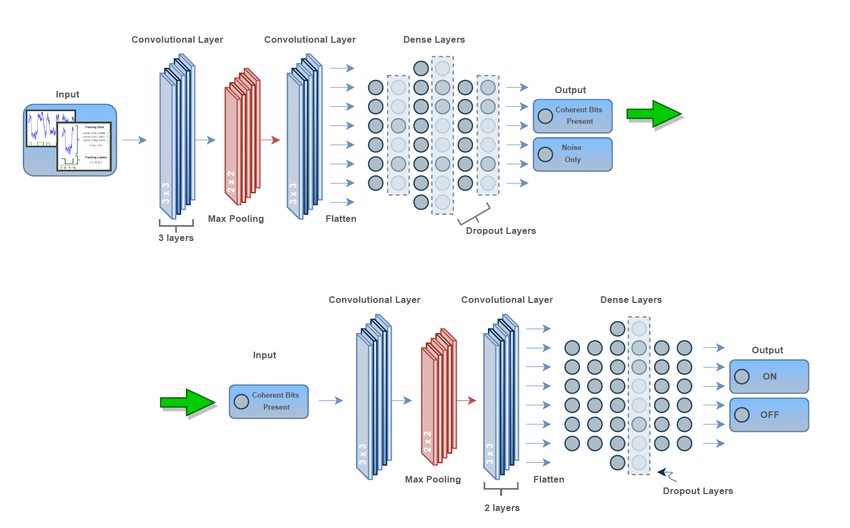
---



# W2 计算机视觉入门
深度神经网络

## 训练10种7万个穿着，使机器识别它们的分类

[Corsera Official Colab](https://www.coursera.org/learn/introduction-tensorflow/ungradedLab/6Hb8q/get-hands-on-with-computer-vision-lab-1/lab?path=%2Flab%2Ftree%2Flab_1)

[Github Fashion Mnist](https://github.com/zalandoresearch/fashion-mnist)


Label	Description.  
0	T-shirt/top.  
1	Trouser.  
2	Pullover.  
3	Dress.  
4	Coat.  
5	Sandal.  
6	Shirt.  
7	Sneaker.  
8	Bag.  
9	Ankle boot.



plot打印图片 (可以在pycharm中查看数据集任一下标的图片)

```
def print_fashion_image(index):
    # @index You can put between 0 to 59999 here

    # Set number of characters per row when printing
    np.set_printoptions(linewidth=640)

    # Print the label and image
    print(f'LABEL: {training_labels[index]}')
    print(f'\nIMAGE PIXEL ARRAY:\n\n{training_images[index]}\n\n')

    # Visualize the image using the default colormap (viridis)
    plt.imshow(training_images[index])
    plt.colorbar()
    plt.show()
```



```
控制台16*16矩阵显示训练数据集图像1
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1   0   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   3   2   2   0   0]
 [  0   0   0   0   0   0   0   1   0  16  11   0   0   0  37   3]
 [  0   0   0   0   0   0   0   3   2  97 111  48  41  69 102   2]
 [  0   0   0   0   0   0   3   0  60 132 157 180 172 171 126   0]
 [  0   0   1   1   2   3   0  40 118 110 153 144 166 155 143  11]
 [  1   1   0   0   0   0  44 118 109 130 146 147 161 146 167  63]
 [  0   2  18  23  54  90 116 113 128 142 156 156 152 143 165 105]
 [ 40  81  90  99 112 120 120 119 130 145 149 154 154 144 177 116]
 [ 87 155 148 153 139 133 141 165 179 190 191 209 247 233 231 113]
 [  0  11  45  90 113 117 118 117  80  24  13  67 129 105 102  45]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   1   3   4   4   4   4   3   1   1   2   4   3   3   2]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
```
Pycharm Plots显示训练数据集图像1:  
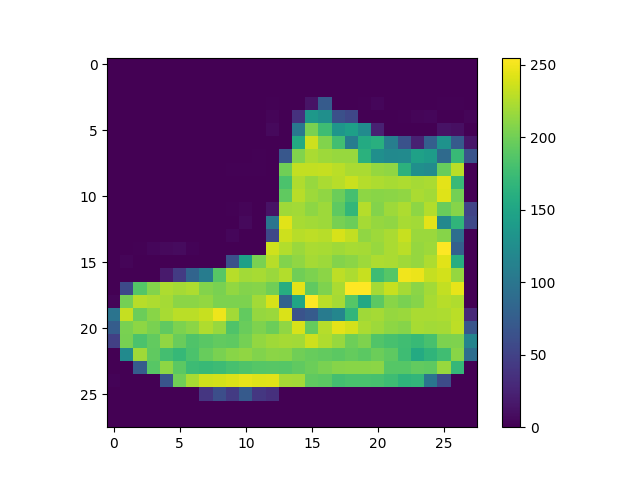



In [ ]:
import numpy as np
import tensorflow as tf


# 自定义一个回调函数 myCallback，每个 epoch 结束后检查 logs['accuracy']，如果 准确率 ≥ 60%，就停止训练
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # if logs['loss'] < 0.4:
        if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

# 加载并预处理 Fashion MNIST 数据
fmnist = tf.keras.datasets.fashion_mnist
# 载入 Fashion MNIST 数据集，数据是 28x28 的灰度图，共 10 个类别
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# 归1化（normalization），将像素值从 [0, 255] 变为 [0, 1]，有助于模型训练。
training_images=training_images / 255.0
test_images=test_images / 255.0

# 构建神经网络模型
# Dense 512，表示Dense Layer有512个神经元，神经元的数量 决定这一层的输出空间，784维的向量经过这一层会得到512维输出，也就是从784个数字中提取有效特征，压缩为512个数字
# ReLU(x) = max(0, x)：将 负数输出为 0，正数保持不变。
# Softmax 函数将输出的 10 个神经元转换为 概率分布，每个神经元输出一个介于 0 和 1 之间的值，所有神经元的输出值加起来等于 1.
#	•	公式：Softmax(x_i) = exp(x_i) / sum(exp(x_j))，其中 x_i 是第 i 个神经元的输出，exp 是指数函数，sum(exp(x_j)) 是所有输出的指数之和。
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)), #输入层，形状=28*28像素
    tf.keras.layers.Flatten(), #把 28x28 的图片拉平成 1D 向量（784 维），供全连接层使用。
    tf.keras.layers.Dense(512, activation=tf.nn.relu), # 将一个 512 个神经元的隐藏层，使用 ReLU 作为激活函数。
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #输出层，10 个类别，softmax 计算概率
])

# 编译模型
# 优化器（optimizer）：Adam，自适应学习率，常用于深度学习。
# 损失函数（loss）：sparse_categorical_crossentropy
#	•	适用于 标签是整数（0-9） 的分类任务（如果标签是独热编码，应使用 categorical_crossentropy）。
# 评估指标（metrics）：accuracy（准确率）。
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

# predict() 会返回 概率分布，即每个类别的预测概率。
# - classifications包含了 模型对测试数据集的预测输出，内包含1万个元素， 每个test_image对应一个预测结果。每个元素是测试图片10个分类的概率分布
classifications = model.predict(test_images)

# print： classifications[0] = [0.00002, 0.00000, 0.00002, 0.00000, 0.00001, 0.08011, 0.00002, 0.10665, 0.00178, 0.81139]
# 表明第一个测试图片 大概率（0.81）是分数9，ankle boot

**拓展**
- Flatten 可打平任意形状  
  打平一个2\*3矩阵时，1维数据丢失了形状，也就是只有一个打平后的一维数据，并不知道它是1\*6还是2\*3还是3\*2
- epochs = 5 是指把训练数据的集合训练5遍

# W3 利用卷积神经网络增强视觉效果
卷积神经网络

### 深度神经网络和卷积神经网络的差异

|  | **深度神经网络（DNN）** | **卷积神经网络（CNN）** |
|---|---|---|
| **输入数据格式** | 需要将 `28×28` 图片 **展平** 为 `784` 维向量 | 直接输入 `28×28×1` 的二维图像 |
| **特征提取方式** | 通过 `全连接层（Dense）` 学习全局特征 | 通过 `卷积层（Conv2D）` 学习局部特征 |
| **参数数量** | 非常多，因为每个神经元都连接到所有输入 | 相对较少，卷积核共享参数 |
| **空间信息保留** | 丢失空间信息，像素点顺序变得无关 | 保留空间信息，能学习局部特征 |
| **适用数据** | 适用于结构化数据（如表格数据） | 适用于图像、音频等带有空间结构的数据 |

## 什么是卷积和汇集层
卷积是图像加滤镜以突出图像的重要标志性特征，而卷积神经网络(CNN)比传统滤镜更智能，可以自动学习最优滤波器来识别关键特征。  

**汇集层**, 卷积还可以和池化技术结合来提高特征提取能力，降低计算复杂度。 池化的本质是压缩图片，降低计算量，减少过拟合，增加模型的平衡不变性。   
2*2的最大池将图片处理后，像素后减半。  
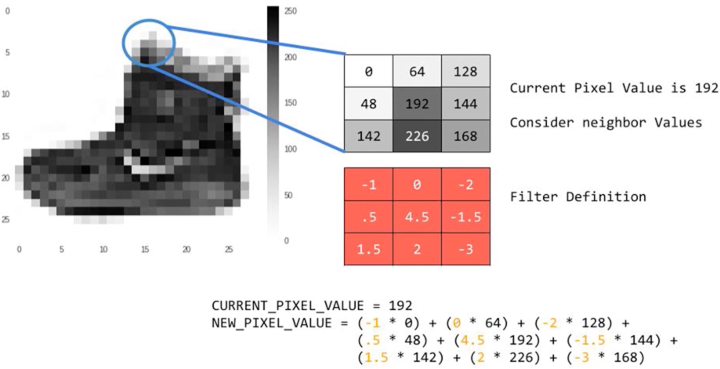

In [ ]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# 归一化。Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

# 添加一个单一卷积层和汇集层，提高预测的准确率
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    # 创建64个filters(滤波器，也就是卷积核),这些滤镜是3*3(也就是检查每个像素格3*3的像素)
    # 卷积不会压缩图像，卷积过后每个像素格上的数字都会被filter重新计算，输出的图像是26*26
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # 最大池，每4个像素格中最大的值存活；会将图像压缩到分辨率减半。
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary 打印模型结构信息
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_images, training_labels, epochs=5)

# 评估模型的损失值和精确度 不会反训模型
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)

# W4 使用真实世界的图像
当使用较大的图像、受试者在图像不同位置、多个受试者、受试者存在于有其他物体的图像里，这时需要使用更复杂的深度学习算法来识别真实世界的图像。  

## 训练一个能区分人和马的模型

- 二分类问题： 如垃圾邮件检测、疾病诊断（有/无）、图像分类（如猫/狗）等。
- Binary Crossentropy 二分类问题使用该loss函数
- RMSProp 一种自适应学习率的优化算法，通过调整每个参数的学习率来加速训练，减少震荡
- Sigmoid 用于输出层将值压缩到0-1之间，以表示二分类的类别归属。


训练数据路径
```
# 人马训练数据集下载： https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset?resource=download
# 解压数据 复制zip解压目录下的train到脚本同级目录

src/
├── train/
│   ├── horse/
│   └── human/
├── validation/
│   ├── beauty.png
│   ├── horse/
│   └── human/
└── trainning.py
```
训练脚本(colab不可执行)
```python
import tensorflow as tf
import numpy as np



TRAIN_DIR = 'train'

train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(300,300),   # 将不同大小的图像调整为300*300
    batch_size=128,         # 每次迭代加载128张图片
    label_mode='binary'     # 模式为二分类标签
)

# 定义了一个 Rescaling 层，该层会将每个像素值从 [0, 255] 范围缩放到 [0, 1] 范围。缩放因子是 1./255，即每个像素值除以 255。
rescale_layer = tf.keras.layers.Rescaling(scale=1./255)

# 使用 map() 函数对整个数据集进行归一化
train_dataset_scaled = train_dataset.map(lambda image, label: (rescale_layer(image), label))

train_dataset_final = (train_dataset_scaled
                       .cache()
                       .shuffle(1000)    # shuffle方法会打乱数据集样本。1000表示缓冲区保留1千个样本，并从样本随机选择
                       .prefetch(tf.data.AUTOTUNE)  # prefetch() 方法会提前加载数据到内存中，避免数据读取成为训练过程的瓶颈。 AutoTune表示自动决定预取的大小。
                      )


model = tf.keras.models.Sequential([
      # Note the input shape is the desired size of the image 300x300 with 3 bytes color
      # This is the first convolution
      tf.keras.Input(shape=(300, 300, 3)),
      tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      # The second convolution
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # The third convolution
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # The fourth convolution
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # The fifth convolution
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(),
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512, activation='relu'),
      # Only 1 output neuron. It will contain a value from 0 to 1 where 0 is for 'horses' and 1 for 'humans'
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

VAL_DIR = 'validation'
# 验证数据集合
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=(300, 300),
    batch_size=32,
    label_mode='binary'
    )
validation_dataset_scaled = validation_dataset.map(lambda image, label: (rescale_layer(image), label))
# 加入验证集会影响你在训练过程中看到的 验证损失（validation loss） 和 验证准确率（validation accuracy）。
# 这些指标是用来判断模型是否在学习过程中出现过拟合或欠拟合的关键因素。
# 如果模型在训练集上表现很好，但在验证集上表现较差，说明模型可能过拟合了。
validation_dataset_final = (validation_dataset_scaled
                            .cache()
                            .prefetch(tf.data.AUTOTUNE)
                            )

"""
verbose 参数选项：
	•	verbose=0：不输出任何训练过程的信息。
	•	verbose=1：显示进度条，训练过程中每个 epoch 会显示进度条和当前 epoch 的损失值（loss）和评估指标（metrics）。
	•	verbose=2：每个 epoch 后输出一行摘要信息，显示当前 epoch 的编号、训练集的损失值和评估指标。
"""
history = model.fit(
    train_dataset_final,
    epochs=15,
    validation_data = validation_dataset_final,
    verbose=2
    )


# 加载美女图片， 让模型预测
# 下载图片，复制到脚本同级目录validation目录下
image = tf.keras.utils.load_img('./validation/beauty.png', target_size=(300, 300))
image = tf.keras.utils.img_to_array(image)
image = rescale_layer(image)
image = np.expand_dims(image, axis=0)

prediction = model.predict(image, verbose=0)[0][0]
# 二分类问题，类别被映射到0=horse或1=human，因此不需要指定标签.
# Sigmoid 函数得到预测结果为0-1的数值，越接近或等于1，表示为human，反之为horse
if prediction > 0.5:
    print("It is a human, ", prediction)
else:
    print("It is a horse, ", prediction)
```

**拓展**

图像大小对模型准确率的影响：  
当调整加载图像的大小为150*150时， 训练花费时间有明显下载，但模型的识别准确率也会下降。

训练数据 **过度拟合(overfit)**：  
模型记住了训练数据中的特定模式，但未能很好地**泛化**到验证数据。  比如在训练识别人和马的模型时，如果全部使用站立的人训练， 在验证时使用坐着的人像时可能导致预测错误， 这时就说明训练数据过度拟合了。